In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.utils import resample

%matplotlib inline

# categorical 
### binary string to binary number
class StringToBinary(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass 
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for columns in X.columns:
            if X[columns].dtype=='object' and len(X[columns].unique())==2:
                X[columns] = pd.factorize(X[columns])[0]     
        return X
### object for a date to datetime and extra feature
obj_date_to_datetime = ['ScheduledDay','AppointmentDay']
class ObjectToDataTime(BaseEstimator,TransformerMixin):
    def __init__(self,obj_date_to_time):
        self.obj_date_to_time = obj_date_to_time
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.obj_date_to_time:
            for columns in self.obj_date_to_time:
                X[columns] = X[columns].apply(pd.to_datetime).dt.normalize()
            X['DaysBetween'] = (X['AppointmentDay'] - X['ScheduledDay']).apply(lambda x:x.days) 
            X = X.drop(obj_date_to_datetime,axis=1)
            return X
        else:
            X = X.drop(obj_date_to_datetime,axis=1)
            return X
            
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributes_name):
        self.attributes_name = attributes_name
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for columns in self.attributes_name:
            return X[columns].values
        
class Get_Dummies(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return pd.get_dummies(X)
    


obj_date_to_dt=['ScheduledDay','AppointmentDay']
cat_pipeline = Pipeline([
    ('StringToBinary',StringToBinary()),
    ('ObjectToDataTime',ObjectToDataTime(obj_date_to_dt)),
    #('GetDummies',Get_Dummies())
])

#train1 = cat_pipeline.fit_transform(train)
#numerical
age_range = ['Age']
class SmallerAgeRange(BaseEstimator,TransformerMixin):
    def __init__(self,age_range):
        self.age_range = age_range
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for col in self.age_range:
            X[col][X[col]<0]=0
            X[col][X[col]>95]=95
        return X
    
class DropNaN(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return pd.DataFrame(X).dropna()

pipeline_num = Pipeline([
    ('SmallerAgeRange',SmallerAgeRange(age_range))
])
#train_prep = pipeline_num.fit_transform(train1)

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df1 = df.copy()

In [3]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Summary after Data Visualization
- Age less than 0 and more than 100 should be drop
- days between where appoitment was earlier than schedule should be drop
- Unnamed:0 can be drop
- Appoitment ID is unique and can be use in index

Data for split 
- we should avoid that we have the same person in train and test
- comparision for diffrent train and test


# Pipeline

# Unbalanced dataset

In [9]:
# categorical 
### binary string to binary number
class StringToBinary(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass 
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for columns in X.columns:
            if X[columns].dtype=='object' and len(X[columns].unique())==2:
                X[columns] = pd.factorize(X[columns])[0]     
        return X
### object for a date to datetime and extra feature
obj_date_to_datetime = ['ScheduledDay','AppointmentDay']
class ObjectToDataTime(BaseEstimator,TransformerMixin):
    def __init__(self,obj_date_to_time):
        self.obj_date_to_time = obj_date_to_time
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.obj_date_to_time:
            for columns in self.obj_date_to_time:
                X[columns] = X[columns].apply(pd.to_datetime).dt.normalize()
            X['DaysBetween'] = (X['AppointmentDay'] - X['ScheduledDay']).apply(lambda x:x.days) 
            X = X.drop(obj_date_to_datetime,axis=1)
            return X
        else:
            X = X.drop(obj_date_to_datetime,axis=1)
            return X
            
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributes_name):
        self.attributes_name = attributes_name
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for columns in self.attributes_name:
            return X[columns].values
        
class Get_Dummies(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return pd.get_dummies(X)
    


obj_date_to_dt=['ScheduledDay','AppointmentDay']
cat_pipeline = Pipeline([
    ('StringToBinary',StringToBinary()),
    ('ObjectToDataTime',ObjectToDataTime(obj_date_to_dt)),
    #('GetDummies',Get_Dummies())
])

#train1 = cat_pipeline.fit_transform(train)
#numerical
age_range = ['Age']
class SmallerAgeRange(BaseEstimator,TransformerMixin):
    def __init__(self,age_range):
        self.age_range = age_range
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for col in self.age_range:
            X[col][X[col]<0]=0
            X[col][X[col]>95]=95
        return X
    
class DropNaN(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return pd.DataFrame(X).dropna()

pipeline_num = Pipeline([
    ('SmallerAgeRange',SmallerAgeRange(age_range))
])
#train_prep = pipeline_num.fit_transform(train1)

#### Accuracy is not good choose for skewed data and for classification

In [ ]:
#rfc_clf.fit(train_prep.values,y_train)
#p = rfc_clf.predict(train_prep.values)

a = pd.DataFrame(train_prep.columns)
a['fi'] = rfc_clf.feature_importances_
a.sort_values(by='fi',ascending=False).iloc[:10]


### Split to train/test before downsampling/ upsamplin

In [21]:
np.random.seed(40)

train, test  = train_test_split(df,test_size=0.33,random_state=42)
print(f'X Train set with attributes has {train.shape[0]} rows and Test set has {test.shape[0]} rows')

#Train
y_train = train['No-show']
X_train = train.drop('No-show',axis=1)
# categorical & numerical pipeline on train
train_prep = cat_pipeline.fit_transform(X_train)
train_prep = pipeline_num.fit_transform(train_prep)
y_train = pd.factorize(y_train)[0]

train_prep = train_prep.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1)


#Test
y_test = test['No-show']
X_test = test.drop('No-show',axis=1)
# categorical & numerical pipeline on train
test_prep = cat_pipeline.transform(X_test)
test_prep = pipeline_num.transform(test_prep)
y_test = pd.factorize(y_test)[0]
test_prep = test_prep.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1)


X Train set with attributes has 74053 rows and Test set has 36474 rows


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### First model without up/downsampling

In [8]:
rfc_clf = RandomForestClassifier()

rfc_clf.fit(train_prep.values,y_train)
p = rfc_clf.predict(train_prep.values)
print(classification_report(y_train,p))

p_test = rfc_clf.predict(test_prep)
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     59033
           1       0.82      0.49      0.61     15020

    accuracy                           0.87     74053
   macro avg       0.85      0.73      0.77     74053
weighted avg       0.87      0.87      0.86     74053

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     29175
           1       0.34      0.19      0.25      7299

    accuracy                           0.76     36474
   macro avg       0.58      0.55      0.55     36474
weighted avg       0.72      0.76      0.74     36474



## Dataset downsampling

In [9]:
#Check if our dataset is balanced or not
ratio = df['No-show'].value_counts()/df['No-show'].value_counts()[1]
print('"No"/"Yes"-Ratio is equal to {}/{}'.format(round(ratio[0],2),ratio[1]))
# here we can see that we have much more 'No' than 'Yes'

"No"/"Yes"-Ratio is equal to 3.95/1.0


No     88208
Yes    22319
Name: No-show, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


              precision    recall  f1-score   support

           0       0.85      0.84      0.84     15020
           1       0.84      0.85      0.85     15020

    accuracy                           0.85     30040
   macro avg       0.85      0.85      0.85     30040
weighted avg       0.85      0.85      0.85     30040

0.8451065246338215
              precision    recall  f1-score   support

           0       0.70      0.38      0.49     29175
           1       0.12      0.35      0.18      7299

    accuracy                           0.37     36474
   macro avg       0.41      0.37      0.34     36474
weighted avg       0.59      0.37      0.43     36474



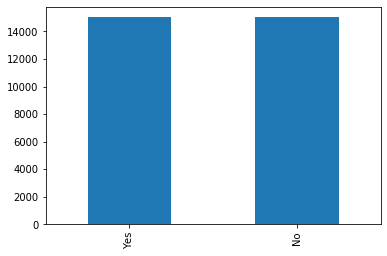

In [23]:
#Model
rfc_clf = RandomForestClassifier()
np.random.seed(40)

# I will take whole dataset to do down-sampling. After that I will do train and test set

# Separate majority and minority classes
train_majority = train[train['No-show']=='No']
train_minority = train[train['No-show']=='Yes']
 
# Downsample minority class
train_D_majority = resample(train_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=15020,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
train_D = pd.concat([train_minority, train_D_majority])
 
# Display new class counts
train_D['No-show'].value_counts().plot(kind='bar')


#Divide X and y
y_train_D = train_D['No-show']
X_train_D = train_D.drop('No-show',axis=1)

#Pipeline for Train
train_prep_down = cat_pipeline.fit_transform(X_train_D)
train_prep_down = pipeline_num.fit_transform(train_prep_down)
y_train_down = pd.factorize(y_train_D)
y_train_down = y_train_down[0]
train_prep_down = train_prep_down.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1)

rfc_clf.fit(train_prep_down.values,y_train_down)
p_down = rfc_clf.predict(train_prep_down.values)
print(classification_report(y_train_down,p_down))

# How's our accuracy?
print( accuracy_score(y_train_down,p_down) )

p_test_down = rfc_clf.predict(test_prep)
print(classification_report(y_test,p_test_down))

## Upsampling

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


              precision    recall  f1-score   support

           0       0.87      0.79      0.83     59033
           1       0.81      0.88      0.84     59033

    accuracy                           0.84    118066
   macro avg       0.84      0.84      0.83    118066
weighted avg       0.84      0.84      0.83    118066

[0 1]
0.8351345857401792
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     29175
           1       0.30      0.48      0.37      7299

    accuracy                           0.67     36474
   macro avg       0.57      0.60      0.57     36474
weighted avg       0.74      0.67      0.70     36474



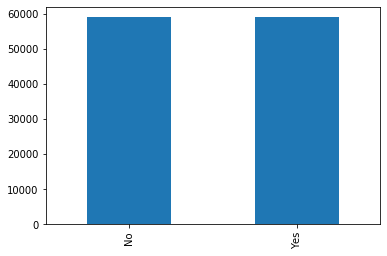

In [24]:
# Downsample minority class
train_U_minority = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=59033,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
train_U = pd.concat([train_majority, train_U_minority])
 
# Display new class counts
train_U['No-show'].value_counts().plot(kind='bar')


#Divide X and y
y_train_U = train_U['No-show']
X_train_U = train_U.drop('No-show',axis=1)
#Pipeline for Train


train_prep_up = cat_pipeline.fit_transform(X_train_U)
train_prep_up = pipeline_num.fit_transform(train_prep_up)
y_train_up = pd.factorize(y_train_U)
y_train_up = y_train_up[0]
train_prep_up = train_prep_up.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1)

rfc_clf.fit(train_prep_up.values,y_train_up)
p_up = rfc_clf.predict(train_prep_up.values)
print(classification_report(y_train_up,p_up))

print( np.unique( p_up ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_train_up,p_up) )


p_test_up = rfc_clf.predict(test_prep)
print(classification_report(y_test,p_test_up))

In [26]:
print('-----------Unbalanced-----------')
print(classification_report(y_test,p_test))
print('-----------Downsampling-----------')
print(classification_report(y_test,p_test_down))
print('-----------Upsampling-----------')
print(classification_report(y_test,p_test_up))

-----------Unbalanced-----------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     29175
           1       0.34      0.19      0.25      7299

    accuracy                           0.76     36474
   macro avg       0.58      0.55      0.55     36474
weighted avg       0.72      0.76      0.74     36474

-----------Downsampling-----------
              precision    recall  f1-score   support

           0       0.70      0.38      0.49     29175
           1       0.12      0.35      0.18      7299

    accuracy                           0.37     36474
   macro avg       0.41      0.37      0.34     36474
weighted avg       0.59      0.37      0.43     36474

-----------Upsampling-----------
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     29175
           1       0.30      0.48      0.37      7299

    accuracy                           0.67     36474
   macro avg       0.57    